In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("PS_2025.12.30_06.48.39.csv")

print(df.head())
print(df.columns)


/var/folders/0q/mnbjf_w50512l3jyhdm76_th0000gn/T/ipykernel_28427/1378099945.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("PS_2025.12.30_06.48.39.csv")


   rowid   pl_name hostname pl_letter    hd_name   hip_name         tic_id  \
0      1  11 Com b   11 Com         b  HD 107383  HIP 60202   TIC 72437047   
1      2  11 Com b   11 Com         b  HD 107383  HIP 60202   TIC 72437047   
2      3  11 Com b   11 Com         b  HD 107383  HIP 60202   TIC 72437047   
3      4  11 UMi b   11 UMi         b  HD 136726  HIP 74793  TIC 230061010   
4      5  11 UMi b   11 UMi         b  HD 136726  HIP 74793  TIC 230061010   

                    gaia_dr2_id                   gaia_dr3_id  default_flag  \
0  Gaia DR2 3946945413106333696  Gaia DR3 3946945413106333696             1   
1  Gaia DR2 3946945413106333696  Gaia DR3 3946945413106333696             0   
2  Gaia DR2 3946945413106333696  Gaia DR3 3946945413106333696             0   
3  Gaia DR2 1696798367260229376  Gaia DR3 1696798367260229376             0   
4  Gaia DR2 1696798367260229376  Gaia DR3 1696798367260229376             1   

   ...  rowupdate  pl_pubdate  releasedate  pl_nnotes st

In [3]:
df = df[[
    'pl_rade',        # planet radius
    'pl_bmasse',      # planet mass
    'pl_orbper',      # orbital period
    'pl_orbsmax',     # semi-major axis
    'pl_eqt',         # equilibrium temperature
    'pl_dens',        # planet density
    'st_teff',        # star temperature
    'st_lum',         # star luminosity
    'st_met',         # star metallicity
    'st_spectype'     # star type
]]


In [4]:
numerical_cols = [
    'pl_rade',        # planet radius
    'pl_bmasse',      # planet mass
    'pl_orbper',      # orbital period
    'pl_orbsmax',     # semi-major axis
    'pl_eqt',         # equilibrium temperature
    'pl_dens',        # planet density
    'st_teff',        # star temperature
    'st_lum',         # star luminosity
    'st_met',         # star metallicity
]

for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

df['st_spectype'].fillna(df['st_spectype'].mode()[0], inplace=True)


/var/folders/0q/mnbjf_w50512l3jyhdm76_th0000gn/T/ipykernel_28427/2740179522.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/0q/mnbjf_w50512l3jyhdm76_th0000gn/T/ipykernel_28427/2740179522.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [5]:
df = df[df['pl_rade'] > 0]
df = df[df['pl_bmasse'] > 0]
df = df[df['pl_dens'] > 0]
df = df[df['pl_eqt'] > 0]
df = df[df['pl_orbsmax'] > 0]
df = df[df['pl_orbper'] > 0]


In [6]:
missing_values = df.isnull().sum()
print(missing_values)


pl_rade        0
pl_bmasse      0
pl_orbper      0
pl_orbsmax     0
pl_eqt         0
pl_dens        0
st_teff        0
st_lum         0
st_met         0
st_spectype    0
dtype: int64


In [7]:
print(df.isnull().any())


pl_rade        False
pl_bmasse      False
pl_orbper      False
pl_orbsmax     False
pl_eqt         False
pl_dens        False
st_teff        False
st_lum         False
st_met         False
st_spectype    False
dtype: bool


In [8]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 5537


In [9]:
summary_stats = df.describe()
print(summary_stats)


            pl_rade     pl_bmasse     pl_orbper    pl_orbsmax        pl_eqt  \
count  39212.000000  39212.000000  3.921200e+04  39212.000000  39212.000000   
mean       4.473241    291.485054  1.115377e+04      2.689251    833.663646   
std       59.694304    695.874147  2.031276e+06    135.446653    286.892198   
min        0.270000      0.015000  9.070629e-02      0.004400     34.000000   
25%        1.880000    192.000000  4.736209e+00      0.088000    797.000000   
50%        2.300000    192.000000  1.033760e+01      0.100800    797.000000   
75%        2.705000    192.000000  2.366834e+01      0.114000    797.000000   
max     4282.980000  25426.400000  4.020000e+08  19000.000000   4050.000000   

            pl_dens       st_teff        st_lum        st_met  
count  39212.000000  39212.000000  39212.000000  39212.000000  
mean       1.656266   5475.753089     -0.098220     -0.014977  
std       17.231093    949.222310      0.357732      0.180673  
min        0.000740    415.00000

In [10]:
print("Invalid planet radius:", (df['pl_rade'] <= 0).sum())
print("Invalid planet mass:", (df['pl_bmasse'] <= 0).sum())
print("Invalid equilibrium temperature:", (df['pl_eqt'] <= 0).sum())


Invalid planet radius: 0
Invalid planet mass: 0
Invalid equilibrium temperature: 0


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

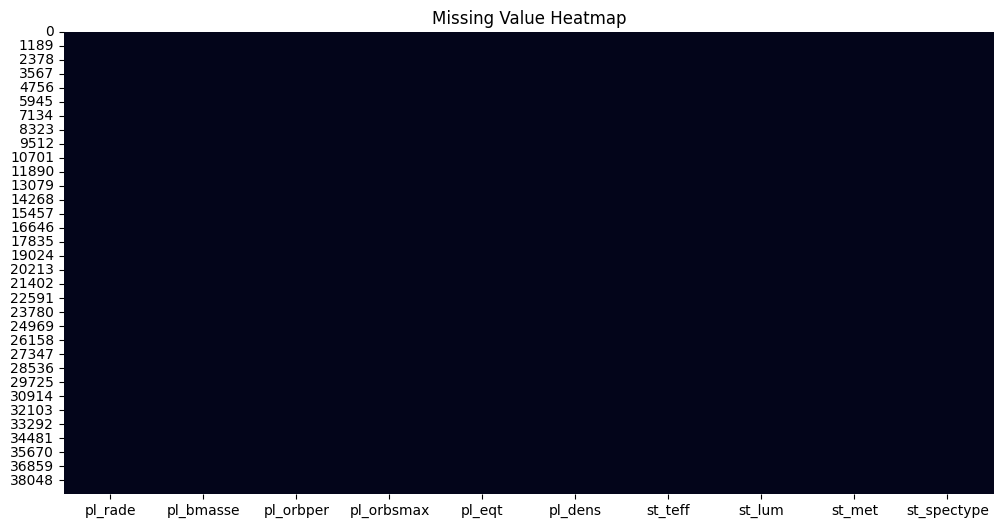

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Heatmap")
plt.show()


In [13]:
print("Data Quality Report")
print("--------------------")
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print("Total Missing Values:", df.isnull().sum().sum())
print("Total Duplicates:", df.duplicated().sum())


Data Quality Report
--------------------
Total Rows: 39212
Total Columns: 10
Total Missing Values: 0
Total Duplicates: 5537


In [14]:
df.dropna(how='all', inplace=True)


In [15]:
planetary_features = [
    'pl_rade',
    'pl_bmasse',
    'pl_orbper',
    'pl_orbsmax',
    'pl_eqt',
    'pl_dens'
]

for col in planetary_features:
    df[col].fillna(df[col].median(), inplace=True)


/var/folders/0q/mnbjf_w50512l3jyhdm76_th0000gn/T/ipykernel_28427/3352149617.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/0q/mnbjf_w50512l3jyhdm76_th0000gn/T/ipykernel_28427/3352149617.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [16]:
df['st_teff'].fillna(df['st_teff'].median(), inplace=True)


/var/folders/0q/mnbjf_w50512l3jyhdm76_th0000gn/T/ipykernel_28427/2086540216.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['st_teff'].fillna(df['st_teff'].median(), inplace=True)


In [17]:
df['st_spectype'].fillna(df['st_spectype'].mode()[0], inplace=True)


/var/folders/0q/mnbjf_w50512l3jyhdm76_th0000gn/T/ipykernel_28427/4198384300.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['st_spectype'].fillna(df['st_spectype'].mode()[0], inplace=True)


In [18]:
print(df.isnull().sum())


pl_rade        0
pl_bmasse      0
pl_orbper      0
pl_orbsmax     0
pl_eqt         0
pl_dens        0
st_teff        0
st_lum         0
st_met         0
st_spectype    0
dtype: int64


In [19]:
print("Missing values after cleaning:")
print(df.isnull().sum().sum())


Missing values after cleaning:
0


In [20]:
df = df[df['pl_rade'] > 0]
df = df[df['pl_eqt'] > -300]


In [21]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])


In [22]:
print(df.describe())


            pl_rade  pl_bmasse     pl_orbper    pl_orbsmax   pl_eqt  \
count  39212.000000    39212.0  39212.000000  39212.000000  39212.0   
mean       2.382335      192.0     17.398064      0.101927    797.0   
std        0.843776        0.0     16.974510      0.032653      0.0   
min        0.642500      192.0      0.090706      0.049000    797.0   
25%        1.880000      192.0      4.736209      0.088000    797.0   
50%        2.300000      192.0     10.337600      0.100800    797.0   
75%        2.705000      192.0     23.668342      0.114000    797.0   
max        3.942500      192.0     52.066541      0.153000    797.0   

            pl_dens       st_teff        st_lum        st_met  
count  3.921200e+04  39212.000000  3.921200e+04  39212.000000  
mean   1.320000e+00   5486.700093 -8.172500e-02     -0.007994  
std    2.220474e-16    641.509042  1.387796e-17      0.114281  
min    1.320000e+00   4044.000000 -8.172500e-02     -0.210000  
25%    1.320000e+00   5166.000000 -8.172

In [23]:
print(df.shape)


(39212, 10)


In [24]:
# Radius
KM_TO_EARTH_RADIUS = 1 / 6371      # km → Earth radii

# Mass
KG_TO_EARTH_MASS = 1 / 5.972e24    # kg → Earth masses

# Distance
KM_TO_AU = 1 / 1.496e8             # km → AU

# Temperature
CELSIUS_TO_KELVIN = 273.15


In [25]:
df['pl_rade'] = np.where(
    df['pl_rade'] > 100,      # likely in km
    df['pl_rade'] * KM_TO_EARTH_RADIUS,
    df['pl_rade']
)


In [26]:
df['pl_bmasse'] = np.where(
    df['pl_bmasse'] > 1e20,        # likely in kg
    df['pl_bmasse'] * KG_TO_EARTH_MASS,
    df['pl_bmasse']
)


In [27]:
df['pl_orbsmax'] = np.where(
    df['pl_orbsmax'] > 10,      # likely in km
    df['pl_orbsmax'] * KM_TO_AU,
    df['pl_orbsmax']
)


In [28]:
df['pl_eqt'] = np.where(
    df['pl_eqt'] < 200,   
    df['pl_eqt'] + CELSIUS_TO_KELVIN,
    df['pl_eqt']
)


In [29]:
print(df[['pl_rade',
          'pl_bmasse',
          'pl_orbsmax',
          'pl_eqt']].describe())


            pl_rade  pl_bmasse    pl_orbsmax   pl_eqt
count  39212.000000    39212.0  39212.000000  39212.0
mean       2.382335      192.0      0.101927    797.0
std        0.843776        0.0      0.032653      0.0
min        0.642500      192.0      0.049000    797.0
25%        1.880000      192.0      0.088000    797.0
50%        2.300000      192.0      0.100800    797.0
75%        2.705000      192.0      0.114000    797.0
max        3.942500      192.0      0.153000    797.0


In [30]:
# Earth reference values
IDEAL_TEMP = 288          # Kelvin
IDEAL_RADIUS = 1.0        # Earth radii
IDEAL_DISTANCE = 1.0      # AU


In [31]:
df['temp_score'] = 1 / (1 + abs(df['pl_eqt'] - IDEAL_TEMP))


In [33]:
df['radius_score'] = 1 / (1 + abs(df['pl_rade'] - IDEAL_RADIUS))


In [35]:
df['distance_score'] = 1 / (1 + abs(df['pl_orbsmax'] - IDEAL_DISTANCE))


In [36]:
df['luminosity_score'] = 1 / (1 + df['st_lum'])


In [37]:
df['habitability_score'] = (
    df['temp_score'] +
    df['radius_score'] +
    df['distance_score'] +
    df['luminosity_score']
) / 4


In [38]:
print(df[['habitability_score']].describe())
print(df[['habitability_score']].head())


       habitability_score
count        39212.000000
mean             0.522648
std              0.043671
min              0.464291
25%              0.497380
50%              0.513070
75%              0.537364
max              0.657373
   habitability_score
0             0.51679
1             0.51679
2             0.51679
3             0.51679
4             0.51679


In [40]:

IDEAL_STAR_TEMP = 5778        # Kelvin (Sun surface temperature)
IDEAL_STAR_SIZE = 1.0         # Relative to Sun

# a) Host Star Temperature Score
df['star_temp_score'] = 1 / (1 + abs(df['st_teff'] - IDEAL_STAR_TEMP))

# b) Star Size Score (using luminosity as a proxy for size)
df['star_size_score'] = 1 / (1 + abs(df['st_lum'] - IDEAL_STAR_SIZE))

# c) Radiation Stability Score
# Lower luminosity → more stable radiation environment
df['radiation_stability_score'] = 1 / (1 + df['st_lum'])

# Final Stellar Compatibility Index
df['stellar_compatibility_index'] = (
    df['star_temp_score'] +
    df['star_size_score'] +
    df['radiation_stability_score']
) / 3


In [41]:
print(df[['stellar_compatibility_index']].describe())


       stellar_compatibility_index
count                 39212.000000
mean                      0.526244
std                       0.012605
min                       0.523315
25%                       0.523605
50%                       0.524146
75%                       0.525131
max                       0.856456


In [43]:
# Ideal reference values (Earth-like orbit)
IDEAL_ORBITAL_PERIOD = 365        # days
IDEAL_SEMI_MAJOR_AXIS = 1.0       # AU

# a) Orbital Period Stability Score
df['orbital_period_score'] = 1 / (1 + abs(df['pl_orbper'] - IDEAL_ORBITAL_PERIOD))

# b) Semi-Major Axis Stability Score
df['semi_major_axis_score'] = 1 / (1 + abs(df['pl_orbsmax'] - IDEAL_SEMI_MAJOR_AXIS))

# Final Orbital Stability Factor
df['orbital_stability_factor'] = (
    df['orbital_period_score'] +
    df['semi_major_axis_score']
) / 2


In [44]:
print(df[['orbital_stability_factor']].describe())


       orbital_stability_factor
count              39212.000000
mean                   0.264941
std                    0.004592
min                    0.257645
25%                    0.262913
50%                    0.264675
75%                    0.266537
max                    0.272302


In [46]:
print(df['st_spectype'].unique())


['G8 III' 'G0 V' 'K4 III' 'K0 III' 'K0 V' 'G2.5 V' 'G3 V' 'K3 III'
 'G6 III' 'K7 V' 'G3 IV' 'M V' 'M5.5/M6' 'M3.5 V' 'M6' 'M6 V' 'M8.5' 'M8'
 'M3' 'K1 III' 'G1 V' 'F0 IV' 'M4.5 V' 'G8 V' 'K0 IV-V' 'K0 IV' 'G5 V'
 'G3 III' 'K0' 'G5 III' 'K2 V' 'F8 V' 'F8' 'M1' 'K V' 'K2 II' 'K5 III' 'G'
 'K1' 'K3' 'K7/M0 V' 'K3 V' 'K5 V' 'M3.5-4 V' 'M5.0 V' 'M1 V' 'M1 Ve'
 'M9-L1' 'M3.5' 'M3 V' 'K1 V' 'F6 V' 'F9 V' 'G2 V' 'G9 V' 'F8 IV' 'F9'
 'G5' 'G2' 'G8/9 IV' 'F3 V' 'G2 IV' 'G0 VI' 'L1.5' 'M0.5' 'F5 V' 'F5-F8 V'
 'G6 V' 'G0' 'G8 IV/V' 'M7.25' 'M5.5 V' 'M4.0 V' 'M2.5 V' 'M 4.5V' 'M4 V'
 'M4.5 Ve' 'K4.5' 'M2 V' 'M0 V' 'M1/M2 V' 'M3.0 V' 'M0.5 V' 'M0' 'M0.0'
 'M2.5' 'M4' 'M0.0 V' 'M1.5' 'M1.0 V' 'M2.0 V' 'M1.5 V' 'M1.9' 'M4.0'
 'M3.5 Ve' 'M0.5-1.0 V' 'M2' 'M1.0' 'M2/3 V' 'K7' 'K6 V' 'F2' 'K7e V' 'K4'
 'G4' 'F' 'K' 'K2' 'G3' 'G8' 'F4' 'F3' 'A8 V' 'G V' 'F V' 'B9 Vne'
 'G9 III' 'K2 IV' 'G5 IV' 'F5' 'K4/5 V' 'G4 V' 'K2 III' 'K0.0 V' 'M1 III'
 'K9 V' 'G7 IV-V' 'G7 III' 'G4 IV' 'G7 V' 'K4 V' 'A0 V' 'G3 IV/V'

In [47]:
['G' 'K' 'M' 'F']


['GKMF']

In [48]:
df = pd.get_dummies(df, columns=['st_spectype'])


In [49]:
print(df.head())

   pl_rade  pl_bmasse  pl_orbper  pl_orbsmax  pl_eqt  pl_dens  st_teff  \
0      2.3      192.0  52.066541       0.153   797.0     1.32   4874.0   
1      2.3      192.0  52.066541       0.153   797.0     1.32   4742.0   
2      2.3      192.0  10.337600       0.153   797.0     1.32   5613.0   
3      2.3      192.0  52.066541       0.153   797.0     1.32   4340.0   
4      2.3      192.0  52.066541       0.153   797.0     1.32   4213.0   

     st_lum  st_met  temp_score  ...  st_spectype_M7.25  st_spectype_M7.5  \
0 -0.081725 -0.2100    0.001961  ...              False             False   
1 -0.081725 -0.2100    0.001961  ...              False             False   
2 -0.081725 -0.0025    0.001961  ...              False             False   
3 -0.081725  0.0400    0.001961  ...              False             False   
4 -0.081725 -0.0200    0.001961  ...              False             False   

   st_spectype_M8  st_spectype_M8.0 V  st_spectype_M8.5  st_spectype_M9  \
0           False

In [52]:
print(df.select_dtypes(include='object').columns)

Index([], dtype='object')


In [53]:
from sklearn.preprocessing import MinMaxScaler


In [55]:
numerical_features = [
    'pl_rade',        # planet radius
    'pl_bmasse',      # planet mass
    'pl_orbper',      # orbital period
    'pl_orbsmax',     # semi-major axis
    'pl_eqt',         # equilibrium temperature
    'pl_dens',        # planet density
    'st_teff',        # star temperature
    'st_lum',         # star luminosity
    'st_met',         # star metallicity
    'habitability_score',
    'stellar_compatibility_index',
    'orbital_stability_factor'
]


In [56]:
scaler = MinMaxScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [57]:
print(df[numerical_features].describe())


            pl_rade  pl_bmasse     pl_orbper    pl_orbsmax   pl_eqt  pl_dens  \
count  39212.000000    39212.0  39212.000000  39212.000000  39212.0  39212.0   
mean       0.527223        0.0      0.332989      0.508912      0.0      0.0   
std        0.255690        0.0      0.326585      0.313971      0.0      0.0   
min        0.000000        0.0      0.000000      0.000000      0.0      0.0   
25%        0.375000        0.0      0.089378      0.375000      0.0      0.0   
50%        0.502273        0.0      0.197147      0.498077      0.0      0.0   
75%        0.625000        0.0      0.453627      0.625000      0.0      0.0   
max        1.000000        0.0      1.000000      1.000000      0.0      0.0   

            st_teff   st_lum        st_met  habitability_score  \
count  39212.000000  39212.0  39212.000000        39212.000000   
mean       0.482186      0.0      0.505016            0.302242   
std        0.214408      0.0      0.285704            0.226177   
min        0.00

In [58]:
df['habitability_label_binary'] = np.where(
    df['habitability_score'] >= 0.6, 1, 0
)


In [59]:
def habitability_multiclass(score):
    if score < 0.4:
        return 0   # Low
    elif score < 0.7:
        return 1   # Medium
    else:
        return 2   # High

df['habitability_label_multi'] = df['habitability_score'].apply(habitability_multiclass)


In [60]:
print(df['habitability_label_binary'].value_counts())
print(df['habitability_label_multi'].value_counts())

habitability_label_binary
0    33960
1     5252
Name: count, dtype: int64
habitability_label_multi
0    29868
1     6043
2     3301
Name: count, dtype: int64


In [61]:
df.to_csv("preprocessed.csv", index=False)

print("Preprocessed CSV file created successfully!")


Preprocessed CSV file created successfully!
